In [1]:
import json
from sklearn.metrics import classification_report, confusion_matrix, root_mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
TOPICS = [
    "Conținut pentru adulți",
    "Artă și design",
    "Dezvoltare software",
    "Crime și investigații",
    "Educație și joburi",
    "Electronică și hardware",
    "Divertisment",
    "Viață socială",
    "Modă și frumusețe",
    "Finanțe și afaceri",
    "Mâncare și băuturi",
    "Jocuri",
    "Sănătate",
    "Istorie și geografie",
    "Hobby-uri și casă",
    "Industrial",
    "Literatură",
    "Politică",
    "Religie",
    "Știință, matematică și tehnologie",
    "Software",
    "Sport și fitness",
    "Transport",
    "Turism și călătorii",
]

FORMATS = [
    "Articol academic",
    "Cuprins",
    "Scriere creativă",
    "Pagină de asistență pentru clienți",
    "Forum de discuții",
    "Întrebări frecvente (FAQs)",
    "Conținut incomplet",
    "Articol de cunoștințe",
    "Notificări legale",
    "Articol de tip listă",
    "Articol de știri",
    "Scriere non-ficțiune",
    "Pagină despre organizație",
    "Anunț organizațional",
    "Pagină personală",
    "Blog personal",
    "Pagină de produs",
    "Forum întrebări și răspunsuri",
    "Spam și reclame",
    "Date structurate",
    "Scriere tehnică",
    "Transcriere sau interviu",
    "Tutorial sau ghid",
    "Recenzii ale utilizatorilor",
]

AGE_GROUPS = [
    "Preșcolar",
    "Școală primară",
    "Școală gimnazială",
    "Liceu",
    "Licență",
    "Post-universitar",
]

TASKS = {
    "topic": TOPICS,
    "format": FORMATS,
    "age_group": AGE_GROUPS,
}

In [3]:
data = json.load(open('test_split.json', 'r'))
ref_examples_unfiltered = data['ref']
out_examples_unfiltered = data['out']


In [4]:
ref_examples, out_examples = [], []
topics_set = set()
for ref, out in zip(ref_examples_unfiltered, out_examples_unfiltered):
    skip = False
    for field in ['format', 'topic', 'age_group']:
        if ref[field] not in TASKS[field]:
            skip = True
            break

    if skip:
        continue
    ref_examples.append(ref)
    out_examples.append(out)
    topics_set.add(ref['topic'])
    if ref['int_score'] not in [0, 1, 2, 3, 4, 5]:
        print('Invalid int_score:', ref['int_score'])

print(f'Filtered {len(ref_examples_unfiltered) - len(ref_examples)} examples')
print(f'Found {len(topics_set)} unique topics: {topics_set} out of {len(TOPICS)}')


Filtered 178 examples
Found 24 unique topics: {'Istorie și geografie', 'Industrial', 'Jocuri', 'Viață socială', 'Modă și frumusețe', 'Conținut pentru adulți', 'Transport', 'Turism și călătorii', 'Divertisment', 'Literatură', 'Religie', 'Sănătate', 'Crime și investigații', 'Electronică și hardware', 'Sport și fitness', 'Știință, matematică și tehnologie', 'Mâncare și băuturi', 'Finanțe și afaceri', 'Educație și joburi', 'Dezvoltare software', 'Artă și design', 'Hobby-uri și casă', 'Politică', 'Software'} out of 24


In [5]:
def extract_label_and_map(examples, label, mapper=None):
    if mapper:
        return [mapper(example[label]) for example in examples]
    return [example[label] for example in examples]

In [6]:
ref_score = extract_label_and_map(ref_examples, 'int_score', int)
out_score = extract_label_and_map(out_examples, 'score', float)
out_score_rounded = [round(score) for score in out_score]

ref_score_binary = [1 if score >= 3 else 0 for score in ref_score]
out_score_binary = [1 if score >= 3 else 0 for score in out_score]

In [7]:
print(f"RMSE: {root_mean_squared_error(ref_score, out_score)}")
print(f"MAE: {mean_absolute_error(ref_score, out_score)}")
print(f"Pearson: {pearsonr(ref_score, out_score)[0]}")
print(f"Spearman: {spearmanr(ref_score, out_score)[0]}")

print("Classification Report:")
print(classification_report(ref_score, out_score_rounded, digits=4))

RMSE: 0.6300532070493098
MAE: 0.488103816857114
Pearson: 0.8668203437343469
Spearman: 0.85837513251571
Classification Report:
              precision    recall  f1-score   support

           0     0.6990    0.5523    0.6170      3520
           1     0.6453    0.6313    0.6382      7024
           2     0.5223    0.5882    0.5533      4730
           3     0.4758    0.5503    0.5104      2951
           4     0.7512    0.7128    0.7315      2343
           5     0.0000    0.0000    0.0000        54

    accuracy                         0.6039     20622
   macro avg     0.5156    0.5058    0.5084     20622
weighted avg     0.6124    0.6039    0.6058     20622



In [8]:
print(classification_report(ref_score_binary, out_score_binary, digits=4))

              precision    recall  f1-score   support

           0     0.8762    0.9710    0.9212     15274
           1     0.8801    0.6083    0.7194      5348

    accuracy                         0.8769     20622
   macro avg     0.8782    0.7896    0.8203     20622
weighted avg     0.8772    0.8769    0.8688     20622



/tmp/ipykernel_2081/1521533514.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


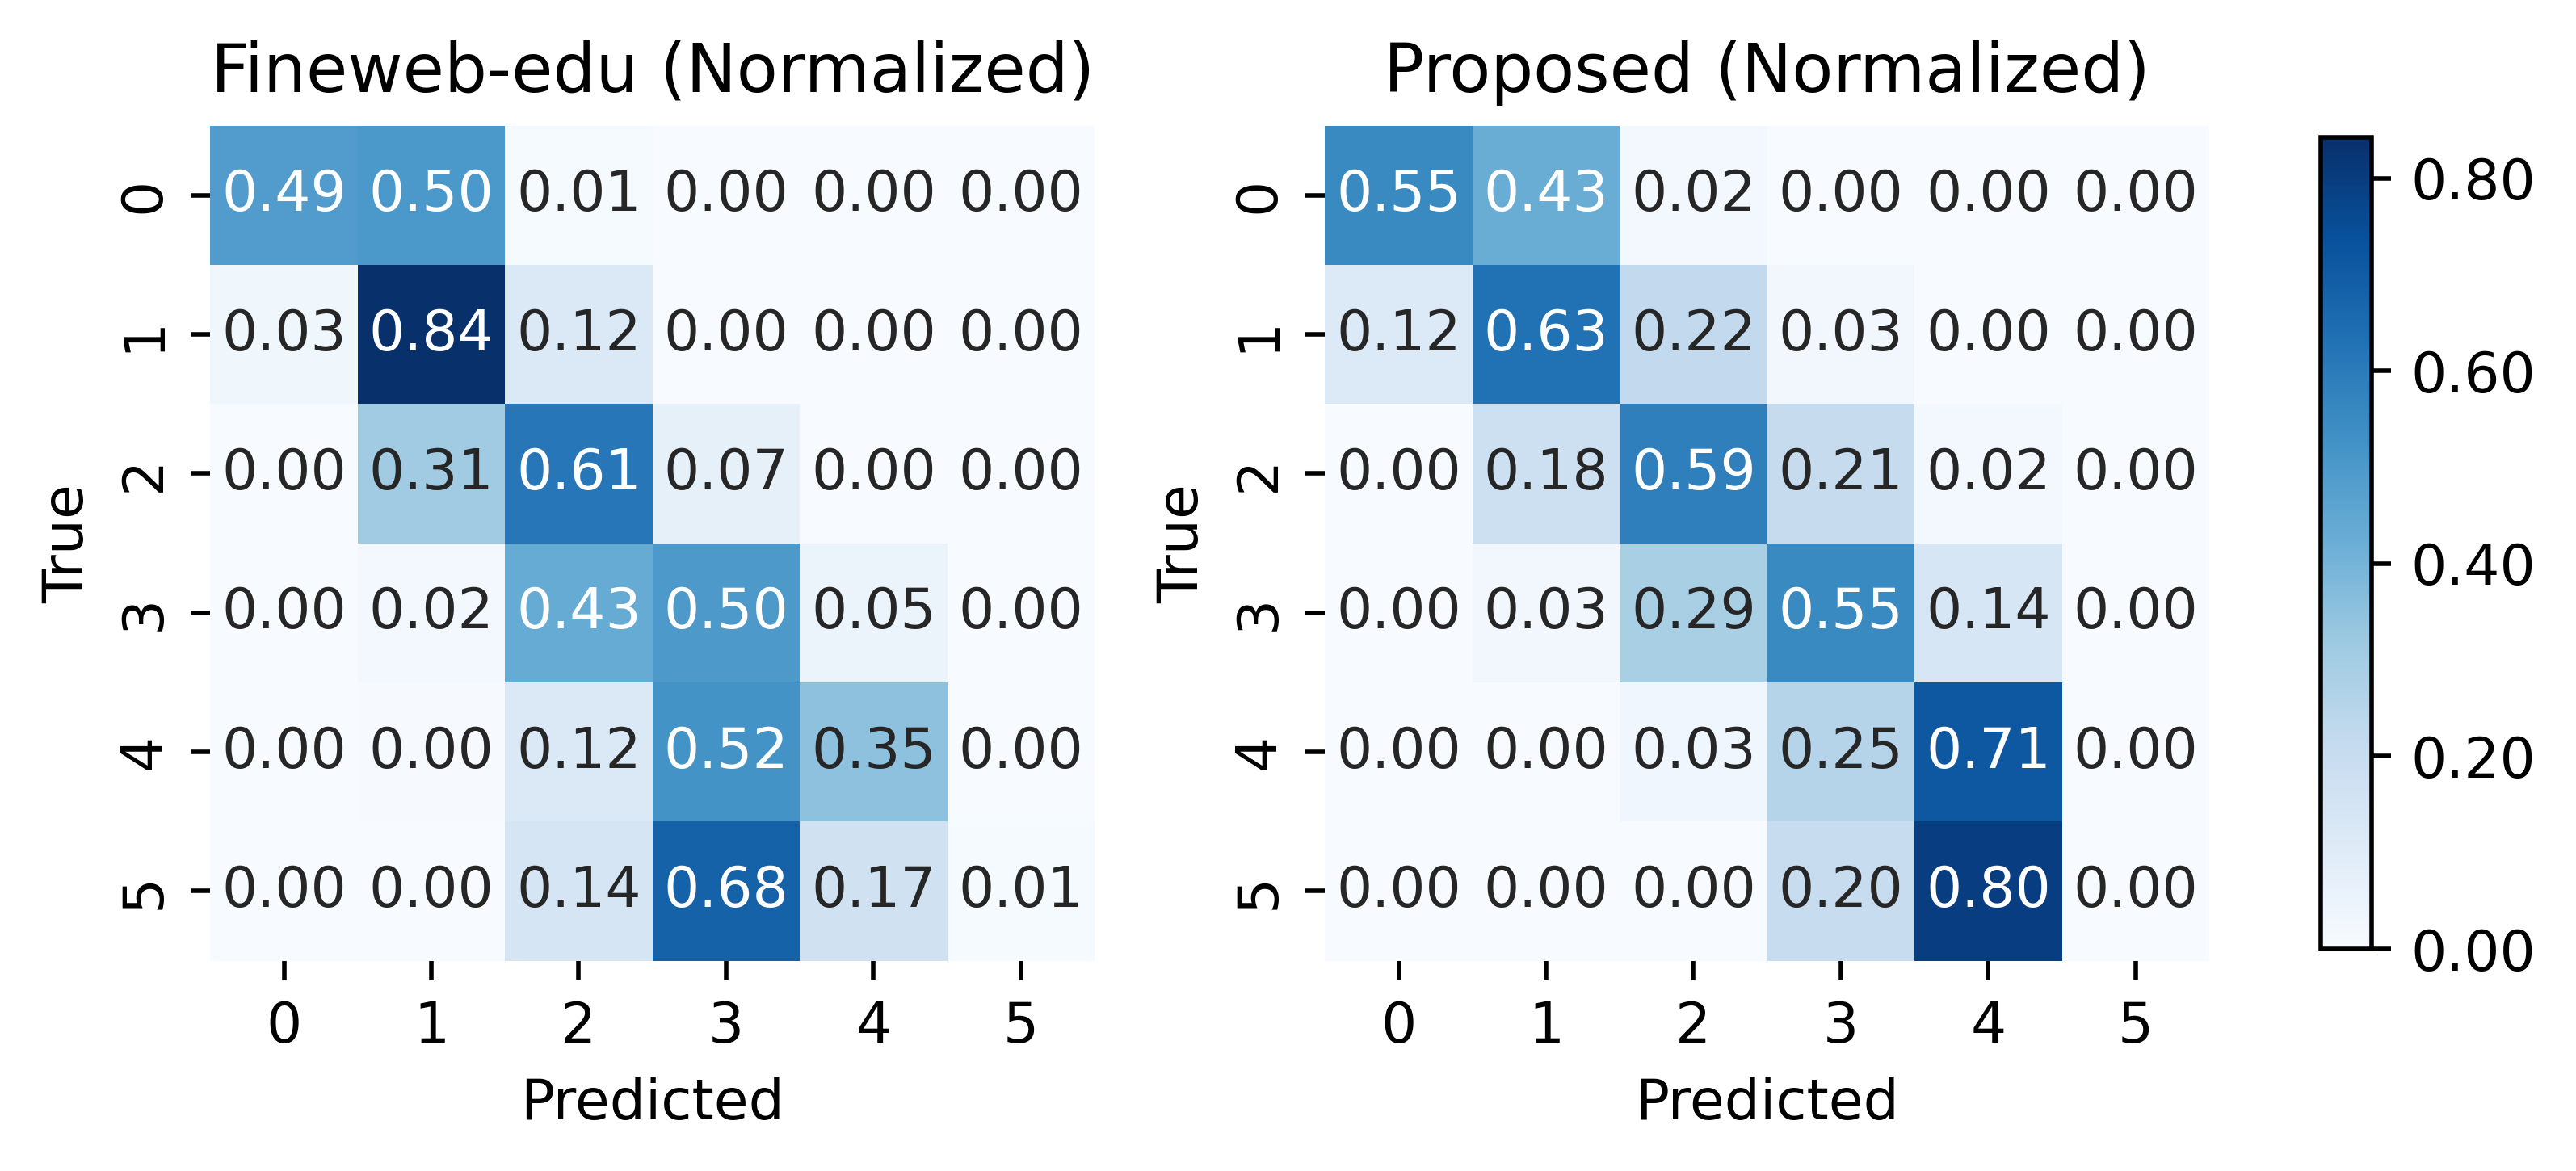

In [9]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500

fineweb_edu_cm = [
    [2791, 2858, 45, 0, 0, 0],
    [919, 22343, 3180, 69, 1, 0],
    [3, 3225, 6330, 757, 7, 0],
    [1, 66, 1473, 1694, 173, 0],
    [0, 4, 98, 420, 283, 2],
    [0, 0, 18, 85, 21, 1]
]
fineweb_edu_cm_np = np.array(fineweb_edu_cm)
fineweb_edu_cm_normalized = fineweb_edu_cm_np / fineweb_edu_cm_np.sum(axis=1, keepdims=True)
fineweb_edu_cm_normalized = np.nan_to_num(fineweb_edu_cm_normalized)

cm = confusion_matrix(ref_score, out_score_rounded, normalize='true')

global_vmin = min(fineweb_edu_cm_normalized.min(), cm.min())
global_vmax = max(fineweb_edu_cm_normalized.max(), cm.max())

fig, axes = plt.subplots(1, 2, figsize=(6.3, 3))
sns.heatmap(fineweb_edu_cm_normalized, annot=True, cmap="Blues", fmt=".2f", ax=axes[0], vmin=global_vmin, vmax=global_vmax, cbar=False)
axes[0].set_title("Fineweb-edu (Normalized)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", ax=axes[1], vmin=global_vmin, vmax=global_vmax, cbar=False)
axes[1].set_title("Proposed (Normalized)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.67])
mappable = plt.cm.ScalarMappable(cmap="Blues")
mappable.set_array([global_vmin, global_vmax])

fig.colorbar(mappable, cax=cbar_ax, format="%.2f")

plt.tight_layout(rect=[0, 0, 0.9, 1])
# plt.savefig('../photos/conf_mat.png', dpi=500)
plt.show()


In [10]:
ref_topics = extract_label_and_map(ref_examples, 'topic')
out_topics = extract_label_and_map(out_examples, 'topic_class_1')

print(classification_report(ref_topics, out_topics, digits=4))

                                   precision    recall  f1-score   support

                   Artă și design     0.7561    0.7331    0.7444       296
           Conținut pentru adulți     0.7981    0.7054    0.7489       241
            Crime și investigații     0.8631    0.8598    0.8615       792
              Dezvoltare software     0.6400    0.4848    0.5517        99
                     Divertisment     0.8267    0.8490    0.8377      1927
               Educație și joburi     0.8484    0.8355    0.8419       784
          Electronică și hardware     0.8713    0.8350    0.8528       600
               Finanțe și afaceri     0.8728    0.8824    0.8776      2287
                Hobby-uri și casă     0.7808    0.7541    0.7672       789
                       Industrial     0.8596    0.7916    0.8242       379
             Istorie și geografie     0.8152    0.8364    0.8257       807
                           Jocuri     0.8502    0.8916    0.8704       452
                       L

In [11]:
ref_format = extract_label_and_map(ref_examples, 'format')
out_format = extract_label_and_map(out_examples, 'format_class_1')
print(classification_report(ref_format, out_format, digits=4))

                                    precision    recall  f1-score   support

              Anunț organizațional     0.6931    0.6455    0.6685      1515
                  Articol academic     0.6809    0.4000    0.5039        80
             Articol de cunoștințe     0.7224    0.8178    0.7671      2157
              Articol de tip listă     0.6511    0.5776    0.6122      1037
                  Articol de știri     0.8855    0.9454    0.9145      7532
                     Blog personal     0.7582    0.7634    0.7608      2650
                Conținut incomplet     0.0000    0.0000    0.0000        23
                           Cuprins     0.5778    0.2430    0.3421       107
                  Date structurate     0.0000    0.0000    0.0000        12
                 Forum de discuții     0.7534    0.6479    0.6967       514
     Forum întrebări și răspunsuri     0.0000    0.0000    0.0000        18
                 Notificări legale     0.7250    0.7190    0.7220       121
Pagină de a

/home/vlad/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vlad/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vlad/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
ref_age_group = extract_label_and_map(ref_examples, 'age_group')
out_age_group = extract_label_and_map(out_examples, 'age_group_class_1')
print(classification_report(ref_age_group, out_age_group, digits=4))

                   precision    recall  f1-score   support

          Licență     0.6263    0.3851    0.4770       457
            Liceu     0.6999    0.5153    0.5936      3431
 Post-universitar     0.5000    0.1091    0.1791        55
        Preșcolar     0.7405    0.5868    0.6547      2115
Școală gimnazială     0.7103    0.8041    0.7543      7693
   Școală primară     0.7440    0.8032    0.7725      6871

         accuracy                         0.7223     20622
        macro avg     0.6702    0.5339    0.5719     20622
     weighted avg     0.7205    0.7223    0.7157     20622

